<center><h2>predicting the right drug for a patient, using k-nearest-neighbors algorithm<h2><h3>by soroush lotfi</h3>
    </center>

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>now what we want to do, is to train a model that can find the right prescription for a patient with some pre-defined features using k-nearest-neighbor algorithm, so let's get into it!
</div>


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
#creating two seperate arrays from dataframe
#X as feature matrix and y as responding vector
X=df[['Age',"Sex",'BP','Cholesterol','Na_to_K']].values
y=df['Drug'].values
X[:5]
# y

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

some features in this dataset are categorical, such as Sex or BP.so we need to convert these features to numerical values using labelEncoder from sklearn

In [4]:
from sklearn import preprocessing

le_sex=preprocessing.LabelEncoder()
le_sex.fit(list(np.unique(X[:,1] #=['F', 'M']
                         )))
X[:,1]=le_sex.transform(X[:,1])

le_BP=preprocessing.LabelEncoder()
le_BP.fit(list(np.unique(X[:,2]#=[0, 1, 2]
                        )))
X[:,2]=le_BP.transform(X[:,2])

le_chl=preprocessing.LabelEncoder()
le_chl.fit(list(np.unique(X[:,3]#=[0, 1]
                         )))
X[:,3]=le_chl.transform(X[:,3])

X

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368],
       [47, 0, 1, 0, 11.767],
       [34, 0, 0, 1, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.942],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 1, 15.516],
       [69, 1, 1, 1, 11.455],
       [43, 1, 0, 0, 13.972],
       [23, 1, 1, 0, 7.298],
       [32, 0, 0, 1, 25.974],
       [57, 1, 1, 1, 19.128],
       [63, 1, 2, 0, 25.917],
       [47, 1, 1, 1, 30.568],
       [48, 0, 1, 0, 15.036],
       [33, 0, 1, 0, 33.486],
       [28, 0, 0, 1, 18.809],
       [31, 1, 0, 0, 30.366],
       [49, 0, 2, 1, 9.381],
       [39, 0, 1, 1, 22.697],
       [45, 1, 1, 0, 17.951],
       [18, 0, 2, 1, 8.75],
       [74, 1, 0, 0, 9.567],
       [49, 1, 1, 1, 11.014],
       [65, 0, 0,

now we need to split the data into test and train

In [5]:
from sklearn import model_selection

X_train,X_test,y_train,y_test=model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
#checking wether if the data split worked OK or not:
print ('shape of Train set:', X_train.shape,  y_train.shape)
print ('shape of Test set:', X_test.shape,  y_test.shape)


shape of Train set: (160, 5) (160,)
shape of Test set: (40, 5) (40,)



### now data is ready to be used

#### for now, we just start with k=2




In [6]:
from sklearn.neighbors import KNeighborsClassifier
k=2
drugKnn=KNeighborsClassifier(n_neighbors=k)

In [7]:
drugKnn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

### Predicting

now We can use the model to make predictions on the test set:


In [8]:
yhat=drugKnn.predict(X_test)
print(yhat[0:5])
y_train[0:5]

['drugA' 'drugY' 'drugX' 'drugB' 'drugY']


array(['drugX', 'drugX', 'drugX', 'drugY', 'drugY'], dtype=object)


### Accuracy evaluation


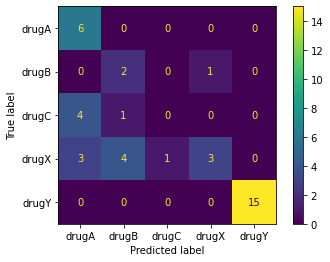

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, yhat,
                      labels=drugKnn.classes_
                     )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=drugKnn.classes_)
disp.plot()
plt.show()

In [10]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, drugKnn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.84375
Test set Accuracy:  0.65


## testing the accuracy for other Ks

In [11]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.675, 0.65 , 0.775, 0.7  , 0.7  , 0.65 , 0.675, 0.65 , 0.65 ])

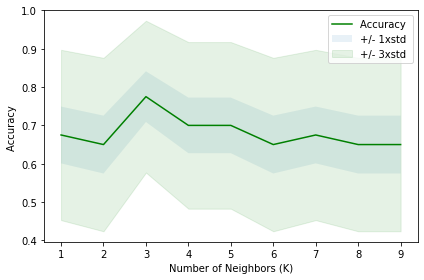

In [12]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [13]:

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.775 with k= 3


#### so we found out the best accuracy for our model happens when k is equal to 3 and has only then, has an accuracy of 0.775, which is pretty good
